In [2]:
import numpy as np 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt                               
import os 
import matplotlib.colors as mcolors
from matplotlib.ticker import MultipleLocator
import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.gridspec as gridspec
matplotlib.rcParams["figure.dpi"] = 150
from particle import PDGID
import sys
sys.path.append("/home/dabadjiev/smartpixels_ml_dsabadjiev/Muon_Collider_Smart_Pixels/daniel/validationPlots/")
from plotUtils import *
import pickle

In [3]:
truthSig = pd.read_pickle("dfOfTruthSig.pkl")
truthBib = pd.read_pickle("dfOfTruthBib.pkl")
xSizesBib=truthBib["xSize"]
ySizesBib=truthBib["ySize"]
nPixelsBib=truthBib["nPix"]
xSizesSig=truthSig["xSize"]
ySizesSig=truthSig["ySize"]
nPixelsSig=truthSig["nPix"]
with open("avgProfBib.pkl",'rb') as handle:
    avgClustDictBib = pickle.load(handle)
with open("avgProfSig.pkl",'rb') as handle:
    avgClustDictSig = pickle.load(handle)

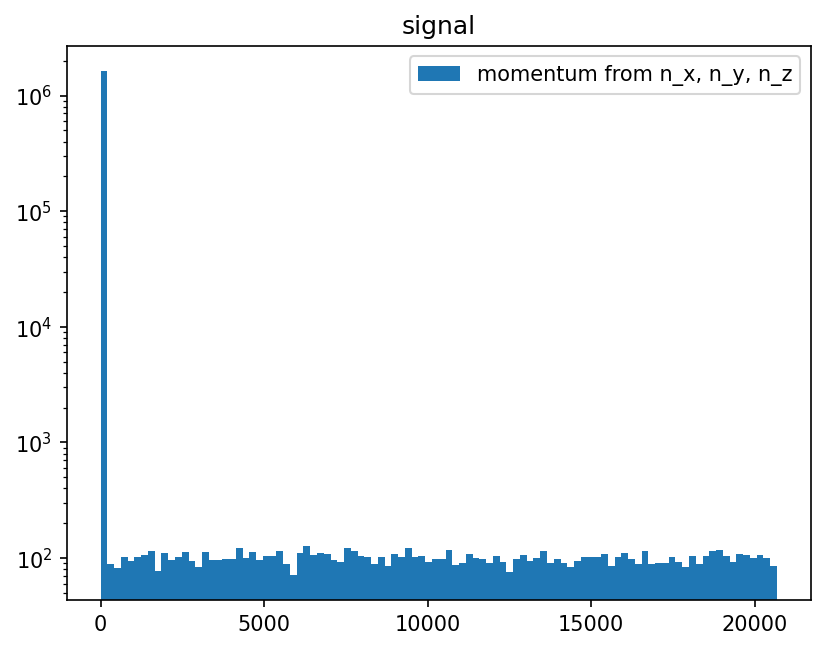

(array([262652., 210451., 210184., 210154., 199557., 168095., 139460.,
        110400.,  81175.,  42561.]),
 array([3.00000000e-05, 9.99986220e+00, 1.99996944e+01, 2.99995266e+01,
        3.99993588e+01, 4.99991910e+01, 5.99990232e+01, 6.99988554e+01,
        7.99986876e+01, 8.99985198e+01, 9.99983520e+01]),
 <BarContainer object of 10 artists>)

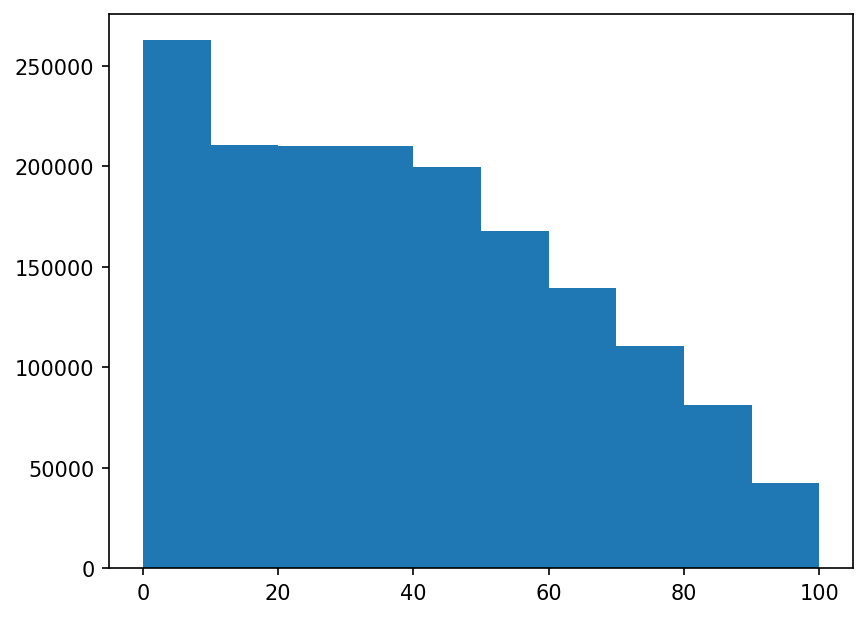

In [4]:
bins = 100
# plt.hist(truthSig["p_calc1"]*truthSig["scalePion"], label="momentum from n_x, n_y, n_z",bins=bins)
plt.hist(truthSig["p_calc1"], label="momentum from n_x, n_y, n_z",bins=bins)
# plt.hist(truthSig["p_calc2"], label="momentum from pt, cotAlphaBeta",alpha=0.5,bins=bins)
plt.yscale('log')
plt.legend()
plt.title("signal")
plt.show()
# plt.hist(truthBib["p_calc1"]*truthBib["scalePion"], label="momentum from n_x, n_y, n_z",bins=bins)
# plt.hist(truthBib["p_calc2"], label="momentum from pt, cotAlphaBeta",alpha=0.5,bins=bins)
# plt.yscale('log')
# plt.legend()
# plt.title("bib")
# plt.show()
plt.hist(truthSig["pt"])

# plt.hist(truthSig["p_calc1"]-truthSig["p_calc2"],label="momentum difference",bins=bins)
# plt.yscale('log')
# plt.legend()
# plt.show()
# plt.hist(truthSig["p_calc1"]-truthSig["p_calc2"],label="momentum quotient",bins=bins)
# plt.yscale('log')
# plt.show()

# plt.hist(truthSig["n_x"]*truthSig["n_x"]+truthSig["n_y"]*truthSig["n_y"]+truthSig["n_z"]*truthSig["n_z"],bins=np.linspace(0,1,10
# ))
# plt.yscale('log')
# plt.show()

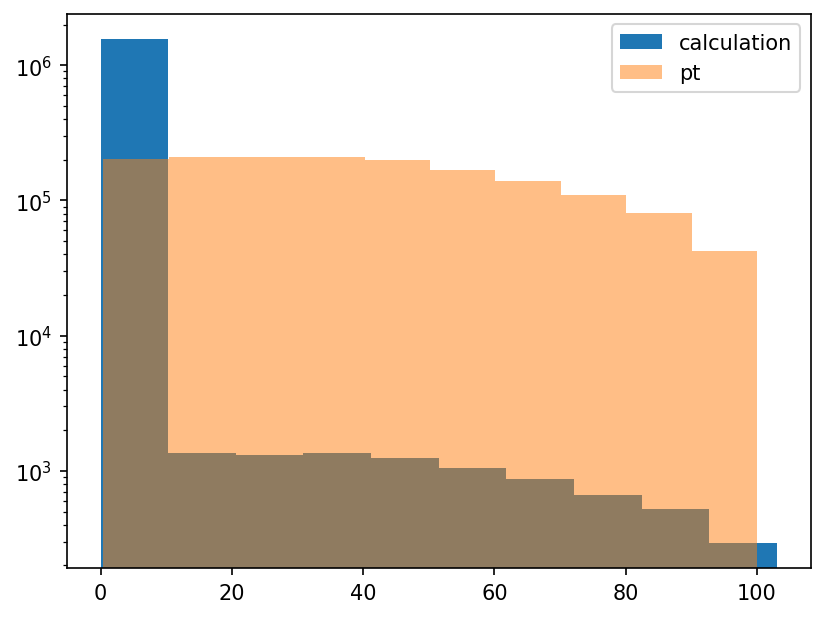

In [15]:
qq = truthSig['pt']*np.sqrt(1+ 1/ (truthSig['cotAlpha']*truthSig['cotAlpha'] + truthSig['cotBeta']*truthSig['cotBeta']) )
qq =  (truthSig['cotAlpha']*truthSig['cotAlpha'] + truthSig['cotBeta']*truthSig['cotBeta'])
qq2 = (truthSig['n_x']*truthSig['n_x']+truthSig['n_y']*truthSig['n_y']) / (truthSig['n_z']*truthSig['n_z'])
qq3 = (truthSig['n_z']*truthSig['n_z']+truthSig['n_y']*truthSig['n_y']) / (truthSig['n_x']*truthSig['n_x']+truthSig['n_y']*truthSig['n_y'] + truthSig['n_z']*truthSig['n_z'])
p = truthSig['pt'] / np.sqrt(qq3)

qq4 = (truthSig['n_z']*truthSig['n_z']+truthSig['n_y']*truthSig['n_y']) / (truthSig['scalePion']*truthSig['scalePion'])
p2 = np.sqrt(qq4) / 200
plt.hist(p2,label="calculation")
plt.yscale('log')
# plt.show()
plt.hist(truthSig['pt'],alpha=0.5,label="pt")
plt.legend()
plt.yscale('log')
plt.show()

(array([1.100215e+06, 4.656930e+05, 5.570000e+02, 1.580000e+02,
        5.400000e+01, 2.900000e+01, 1.500000e+01, 1.000000e+01,
        3.000000e+00, 1.000000e+00]),
 array([5.52670631e-01, 7.03884526e+01, 1.40224235e+02, 2.10060017e+02,
        2.79895799e+02, 3.49731581e+02, 4.19567363e+02, 4.89403145e+02,
        5.59238927e+02, 6.29074709e+02, 6.98910491e+02]),
 <BarContainer object of 10 artists>)

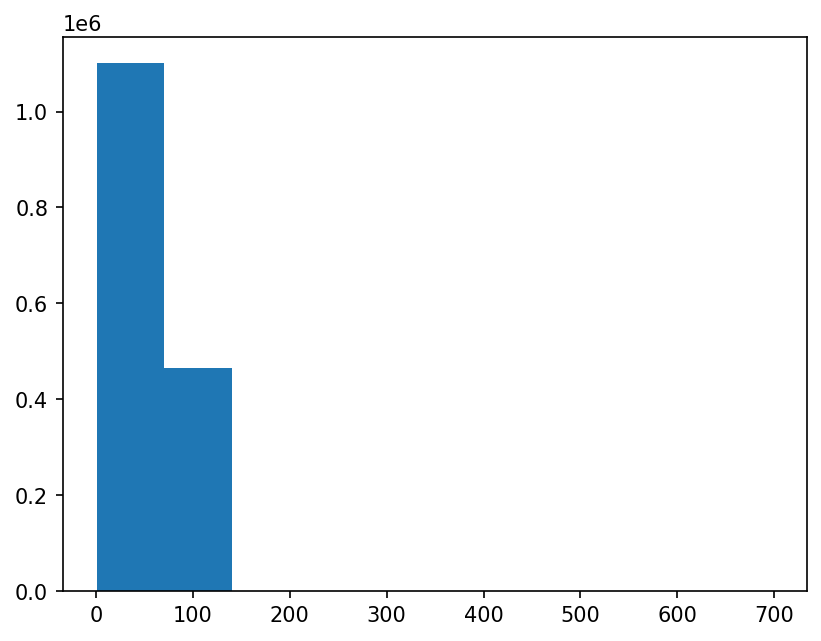

In [13]:
truthSig = truthSig.query("PID == 13 or PID == -13")
z = 1./np.sqrt((1.+truthSig["cotBeta"]*truthSig["cotBeta"]+truthSig["cotAlpha"]*truthSig["cotAlpha"]))
x = z*truthSig["cotAlpha"]
y = z*truthSig["cotBeta"]
qq = x**2 +y**2 +z**2 

p = truthSig["pt"] / np.sqrt((z**2 +y**2)/(x**2 +y**2 +z**2 ))


# qq2 = (truthSig['n_x']*truthSig['n_x']+truthSig['n_y']*truthSig['n_y'] + truthSig['n_z']*truthSig['n_z'])
plt.hist(p)

In [7]:
avgClustDictSig["yProfileLowPtPosLowYl"]

array([1.86051103e+00, 1.45063879e+00, 2.02311266e+00, 4.82229965e+00,
       1.44204413e+01, 6.88759233e+02, 5.16251948e+03, 6.70331220e+02,
       1.29756098e+01, 6.26364692e+00, 2.38606272e+00, 2.67758420e+00,
       7.60394890e-01])

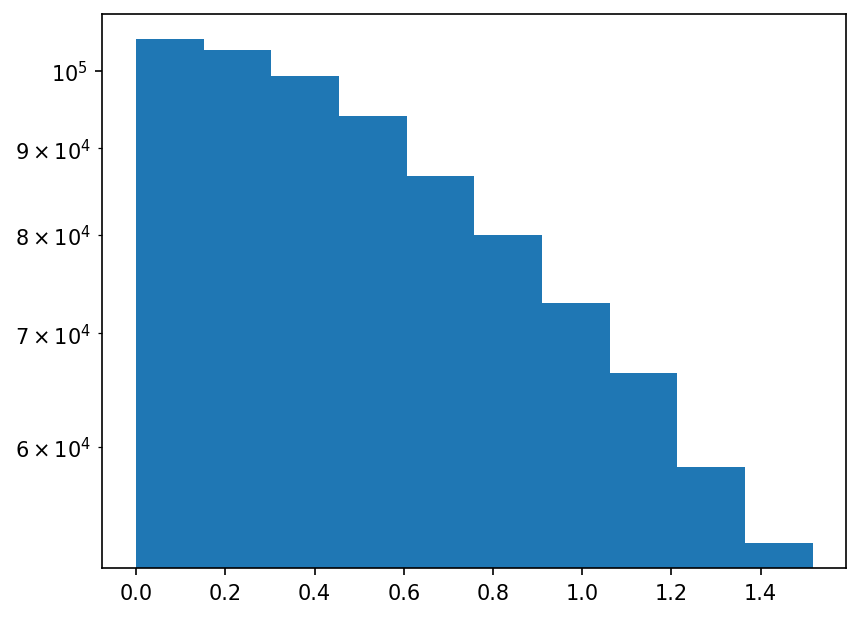

In [6]:
plt.hist(truthSig["eta"])
plt.yscale('log')

In [7]:
print(np.log(2.7))

0.9932517730102834
